In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import control as ct
from control.matlab import *
from IPython.display import display, Latex

In [19]:
def plot_func(K,B,J):
    num = [K]
    den = [J, B, K]
    sys = ct.tf(num, den)
    #print(sys)

    plt.figure(1)
    yout, T = step(sys)
    plt.plot(T.T, yout.T)
    plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=20)
    plt.grid('on')
    
    plt.show()

interact(plot_func, K = (0.1,5,0.1), B = (0.1,5,0.1), J = (0.1,5,0.1) )

interactive(children=(FloatSlider(value=2.5000000000000004, description='K', max=5.0, min=0.1), FloatSlider(va…

<function __main__.plot_func(K, B, J)>

In [20]:
def plot_func(wn,E):
    num = [wn**2]
    den = [1, 2*E*wn, wn**2]
    sys = ct.tf(num, den)

    plt.figure(1)
    yout, T = step(sys)
    plt.plot(T.T, yout.T)
    plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=20)

    plt.grid('on')
    plt.show(block=False)

interact(plot_func, wn = (0.1,5,0.1), E = (0,1.2,0.1))

interactive(children=(FloatSlider(value=2.5000000000000004, description='wn', max=5.0, min=0.1), FloatSlider(v…

<function __main__.plot_func(wn, E)>

In [21]:
def update_plot(p1, p2):
    sys = ct.zpk([], [-p2+2j,-p2-2j, -p1], gain=1)
    yout, T = step(sys)
    plt.plot(T.T, yout.T)
    plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=20)

    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.title('Step Response with Poles and Zeroes')
    plt.grid('on')
    plt.show()
    

interact(update_plot, p1=(0.1, 10, 0.1), p2=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='p1', max=10.0, min=0.1), FloatSlider(value=5.0, desc…

<function __main__.update_plot(p1, p2)>

In [22]:
def update_plot(p1, p2):
    sys = ct.zpk([], [-p2+2j,-p2-2j, -p1], gain=1)
    gan=ct.dcgain(sys)
    sys1= ct.zpk([], [-p1], gain=1)
    gan1=ct.dcgain(sys1)
    sys1= ct.zpk([], [-p1],gain=gan/gan1)
    sys2= ct.zpk([], [-p2+2j,-p2-2j],gain=1)
    gan2=ct.dcgain(sys2)
    sys2= ct.zpk([], [-p2+2j,-p2-2j],gain=gan/gan2)
    y, T = step(sys)
    plt.plot(T.T, y.T)
    y1, T1 = step(sys1)
    plt.plot(T1.T, y1.T)
    y2, T2 = step(sys2)
    plt.plot(T2.T, y2.T)
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.title('Step Response with Poles and Zeroes')
    plt.grid('on')
    plt.legend(['sys','sys1','sys2'])
    plt.show()
    

interact(update_plot, p1=(0, 10, 0.1), p2=(0, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='p1', max=10.0), FloatSlider(value=5.0, description='…

<function __main__.update_plot(p1, p2)>

inf 109.47122063449069 nan 0.9428090415820634


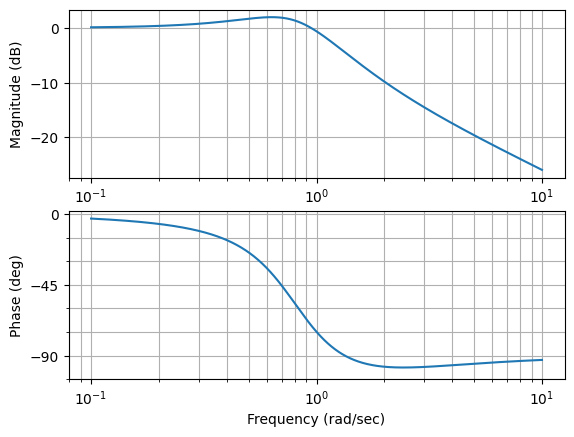

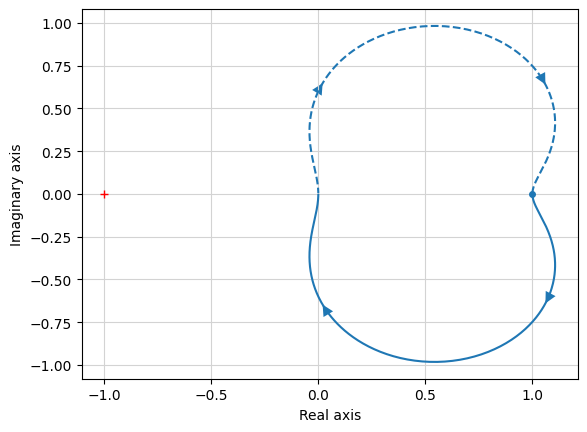

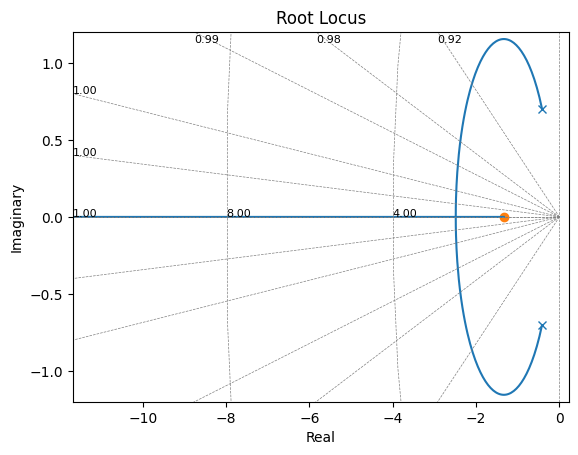

<Figure size 640x480 with 0 Axes>

In [23]:
num = [3., 4.]
den = [6., 5., 4.]
sys = ct.tf(num, den)

# Bode plot for the system
plt.figure(2)
gm, pm, wcg, wcp = ct.margin(sys)
print(gm, pm, wcg, wcp)
mag, phase, om = bode(sys)
plt.show(block=False)

# Nyquist plot for the system
plt.figure(3)
nyquist(sys)
plt.show(block=False)

# Root lcous plot for the system
plt.figure(4)
rlocus(sys)
plt.show()

# Step response for the system
plt.figure(5)
step(sys)
plt.show()


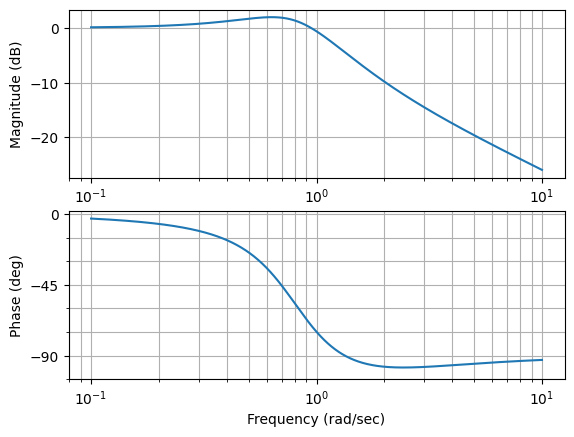

In [24]:
num = [3., 4.]
den = [6., 5., 4.]
sys = ct.tf(num, den)

# Bode plot for the system
plt.figure(2)
bode(sys)
plt.show()

In [25]:
m = 250.0           # system mass
k = 40.0            # spring constant
b = 60.0            # damping constant

# System matrices
A = [[0, 1.], [-k/m, -b/m]]
B = [[0], [1/m]]
C = [[1., 0]]
sys = ss(A, B, C, 0)

Gain margin: 5.56996 at 12.7395
Phase margin: 67.3933 at 2.08419


c:\Users\lauch\AppData\Local\Programs\Python\Python310\lib\site-packages\control\freqplot.py:930: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(
C:\Users\lauch\AppData\Local\Temp\ipykernel_13240\871130212.py:91: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  ct.nyquist_plot(L, (0.0001, 1000))


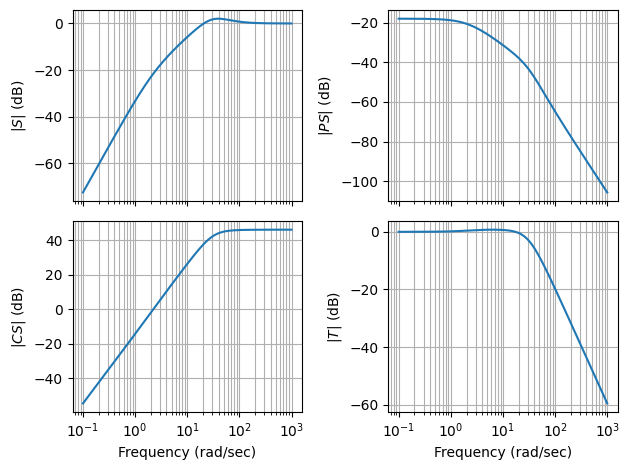

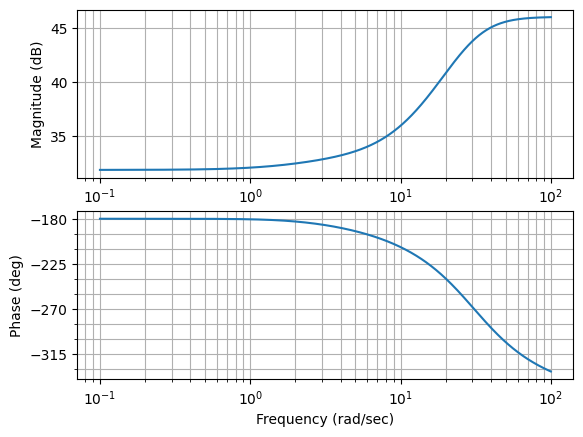

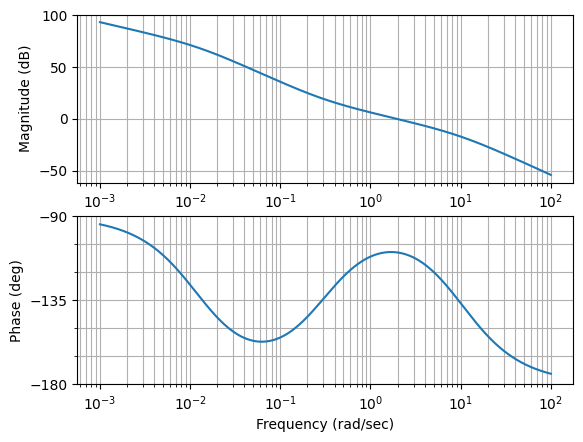

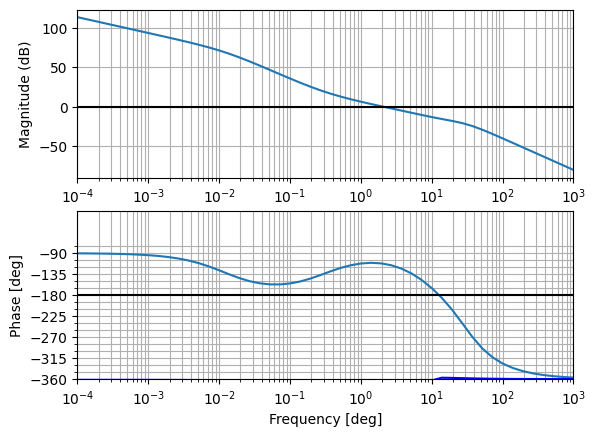

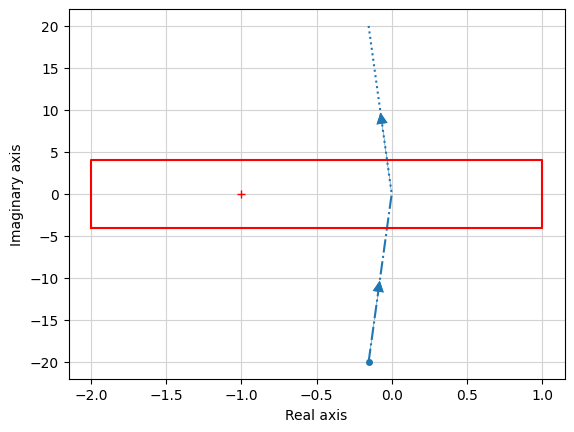

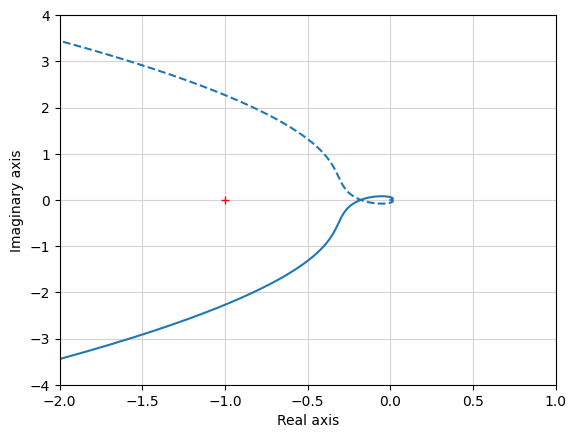

In [26]:
# System parameters
m = 4               # mass of aircraft
J = 0.0475          # inertia around pitch axis
r = 0.25            # distance to center of force
g = 9.8             # gravitational constant
c = 0.05            # damping factor (estimated)

# Transfer functions for dynamics
Pi = ct.tf([r], [J, 0, 0])  # inner loop (roll)
Po = ct.tf([1], [m, c, 0])  # outer loop (position)

# Design a simple lead controller for the system
k, a, b = 200, 2, 50
Ci = k * ct.tf([1, a], [1, b])  # lead compensator
Li = Pi * Ci

# Compute out the gain and phase margins
gm, pm, wcg, wcp = ct.margin(Li)

# Compute the sensitivity and complementary sensitivity functions
Si = ct.feedback(1, Li)
Ti = Li * Si

# Check to make sure that the specification is met
plt.figure(3)
ct.gangof4(Pi, Ci)

# Compute out the actual transfer function from u1 to v1 (see L8.2 notes)
# Hi = Ci*(1-m*g*Pi)/(1+Ci*Pi)
Hi = ct.parallel(ct.feedback(Ci, Pi), -m * g *ct.feedback(Ci * Pi, 1))

plt.figure(4)
plt.clf()
plt.subplot(221)
ct.bode_plot(Hi)

# Now design the lateral control system
a, b, K = 0.02, 5, 2
Co = -K * ct.tf([1, 0.3], [1, 10])  # another lead compensator
Lo = -m*g*Po*Co

plt.figure(5)
ct.bode_plot(Lo)  # margin(Lo)

# Finally compute the real outer-loop loop gain + responses
L = Co * Hi * Po
S = ct.feedback(1, L)
T = ct.feedback(L, 1)

# Compute stability margins
gm, pm, wgc, wpc = ct.margin(L)
print("Gain margin: %g at %g" % (gm, wgc))
print("Phase margin: %g at %g" % (pm, wpc))

plt.figure(6)
plt.clf()
ct.bode_plot(L, np.logspace(-4, 3))


for ax in plt.gcf().axes:
    if ax.get_label() == 'control-bode-magnitude':
        break
ax.semilogx([1e-4, 1e3], 20*np.log10([1, 1]), 'k-')

#
# Replot phase starting at -90 degrees
#
# Get the phase plot axes
for ax in plt.gcf().axes:
    if ax.get_label() == 'control-bode-phase':
        break

# Recreate the frequency response and shift the phase
mag, phase, w = ct.freqresp(L, np.logspace(-4, 3))
phase = phase - 360

# Replot the phase by hand
ax.semilogx([1e-4, 1e3], [-180, -180], 'k-')
ax.semilogx(w, np.squeeze(phase), 'b-')
ax.axis([1e-4, 1e3, -360, 0])
plt.xlabel('Frequency [deg]')
plt.ylabel('Phase [deg]')
# plt.set(gca, 'YTick', [-360, -270, -180, -90, 0])
# plt.set(gca, 'XTick', [10^-4, 10^-2, 1, 100])

#
# Nyquist plot for complete design
#
plt.figure(7)
plt.clf()
ct.nyquist_plot(L, (0.0001, 1000))

# Add a box in the region we are going to expand
plt.plot([-2, -2, 1, 1, -2], [-4, 4, 4, -4, -4], 'r-')

# Expanded region
plt.figure(8)
plt.clf()
ct.nyquist_plot(L)
plt.axis([-2, 1, -4, 4])

# set up the color
color = 'r'